In [8]:
# ACCURACY SCORE
import numpy as np
from sklearn.metrics import accuracy_score
y_true = np.array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])
y_pred = np.array([0, 1, 0, 2, 1, 1, 0, 2, 1, 2])
# function accuracy_score : N_true/ N
def accuracy( y_pred, y_true):
    score = np.sum(y_pred == y_true)
    print(score)
    return float(score)/y_true.shape[0]
print('accuracy_score function: ', accuracy(y_pred, y_true))
print('accuracy_score library: ',accuracy_score(y_pred, y_true))


6
accuracy_score function:  0.6
accuracy_score library:  0.6


In [26]:
# CONFUSION MATRIX
# function confusion matrix
print(np.unique(y_pred).shape[0])
def confusion_matrix_my ( y_pred, y_true):
    N = np.unique(y_pred).shape[0] # number of class
    cm = np.zeros((N,N))
    for n in range( y_true.shape[0]):
        cm[ y_true[n],y_pred[n]] +=1
    return cm
confusionMatrix = confusion_matrix_my(y_pred, y_true)
print('confusion matrix function:\n ', confusionMatrix)
print('accuracy _score of confusion matrix: ', np.diagonal(confusionMatrix).sum()/confusionMatrix.sum())

#confusion matrix normalized (lấy từng phần tử chia cho tổng số phần tử mỗi hàng)
cm_normalized = confusionMatrix/np.sum(confusionMatrix, axis =1, keepdims = True)
print('Normalized confusion matrix : \n ' ,cm_normalized)
from sklearn.metrics import confusion_matrix
print('confusion matrix library: \n', confusion_matrix(y_pred, y_true))

3
confusion matrix function:
  [[2. 1. 1.]
 [1. 2. 0.]
 [0. 1. 2.]]
accuracy _score of confusion matrix:  0.6
Normalized confusion matrix : 
  [[0.5        0.25       0.25      ]
 [0.33333333 0.66666667 0.        ]
 [0.         0.33333333 0.66666667]]
confusion matrix library: 
 [[2 1 0]
 [1 2 1]
 [1 0 2]]


[0.44909289 0.09393342 0.1486204  0.43580406 0.09367245 0.04908051
 0.3817437  0.46548203 0.06370431 0.24778732 0.02142715 0.0931205
 0.00274757 0.35757508 0.40737199 0.14569111 0.04162731 0.29105901
 0.23945923 0.39344204 0.39637583 0.27487569 0.60489091 0.60499449
 0.69847994 0.48898583 0.46828395 0.34871825 0.38078085 0.37175647
 0.4163468  0.68957119 0.56048537 0.20522794 0.41052943 0.55786723
 0.3028531  0.55771343 0.22630342 0.42155893 0.58024341 0.63191827
 0.51561201 0.37018069 0.52984237 0.54610231 0.51649361 0.58936035
 0.67730149 0.38605955]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
threshold: 

[1.69847994 0.69847994 0.46828395 0.43580406 0.41052943 0.40737199
 0.39637583 0.39344204 0.38605955 0.3817437  0.37018069 0.35757508
 0.3028531  0.29105901 0.27487569 0.23945923 0.20522794 0.00274757]
false positive rate: 
 [0.   0.   0.   0.15 0.15 0.2  0.2  0.25 0.25 0.3  0.3  0.35 0.35 0.4
 0.4  0.5  0.5  1.  ]
true pos

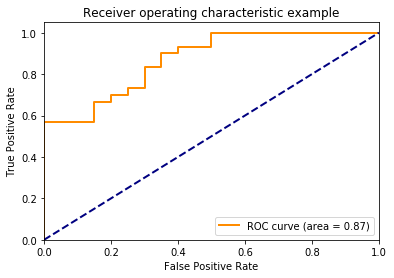

In [37]:
# ROC curve ( điều chỉnh ngưỡng threshold) RECEIVER OPERATING CHARACTERISTIC CURVE,AUC( area under curve)
n0, n1 =20, 30 # n0: negative, n1 : positive
score0 = np.random.rand(n0)/2
label0 = np.zeros(n0, dtype = int)
score1 = np.random.rand(n1)/2 + 0.2
label1 = np.ones(n1, dtype = int)
score = np.concatenate((score0, score1))
y_true = np.concatenate((label0, label1))
print(score)
print(y_true)
# threshold
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_true, score, pos_label =1)
print('threshold: \n')
print(threshold)
print('false positive rate: \n',fpr)
print('true positive rate: \n', tpr)
# Minh họa cho bài toán trên
import matplotlib.pyplot as plt
from itertools import cycle
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
# Precision Recall
# precision = TP/(TP + FP): số điểm true positive / ( tổng số dự đoán positive)
# recall =    TP/(TP + FN): số điểm true positive/ (thực sự là positive)

def precision_recall(cm):
    precision = cm[0,0]/np.sum(cm[:,0])
    recall    = cm[0,0]/np.sum(cm[0])
    return (precision, recall)
cm = np.array([[100., 10],[20, 70]])
precision_recall(cm)

(0.8333333333333334, 0.9090909090909091)